In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

In [3]:
(ds_test, ds_val, ds_train), ds_info = tfds.load(
    'mnist',
    split=['test', 'train[0%:17%]', 'train[17%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [4]:
len(ds_train), len(ds_val), len(ds_test)

(49800, 10200, 10000)

In [5]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

In [6]:
ds_train = ds_train.map(
    normalize_img, 
    num_parallel_calls=tf.data.AUTOTUNE
)

ds_train = ds_train.cache()
ds_train = ds_train.shuffle(len(ds_train))
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [7]:
ds_val = ds_val.map(
    normalize_img, 
    num_parallel_calls=tf.data.AUTOTUNE
)

ds_val = ds_val.cache()
ds_val = ds_val.batch(128)
ds_val = ds_val.prefetch(tf.data.AUTOTUNE)

In [8]:
ds_test = ds_test.map(
    normalize_img, 
    num_parallel_calls=tf.data.AUTOTUNE
)

ds_test = ds_test.cache()
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [9]:
history = []

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(384, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.summary()

/Users/henrik/dev/aai-cnn/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 384)            │       301,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,010 (1.34 MB)

 Trainable params: 352,010 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [12]:
history.append(('Basic DNN', model.fit(
    ds_train,
    epochs=25,
    validation_data=ds_val,
)))

Epoch 1/25


2025-03-21 14:33:57.618993: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5015 - sparse_categorical_accuracy: 0.8568 - val_loss: 0.1391 - val_sparse_categorical_accuracy: 0.9583
Epoch 2/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1216 - sparse_categorical_accuracy: 0.9627 - val_loss: 0.1096 - val_sparse_categorical_accuracy: 0.9664
Epoch 3/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0749 - sparse_categorical_accuracy: 0.9766 - val_loss: 0.0912 - val_sparse_categorical_accuracy: 0.9733
Epoch 4/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0453 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.0868 - val_sparse_categorical_accuracy: 0.9752
Epoch 5/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0326 - sparse_categorical_accuracy: 0.9902 - val_loss: 0.0893 - val_sparse_categorical_accuracy: 0.9745
Epoch 6/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0291 - sparse_categorical_accuracy: 0.9904 - val_loss: 0.0820 - val_sparse_categorical_accuracy: 0.9784
Epoch 7/25
390/

In [13]:
model.evaluate(ds_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1032 - sparse_categorical_accuracy: 0.9817


[0.10671009868383408, 0.9811999797821045]

In [14]:
del model

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(
        384, 
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.L2(0.005),
    ),
    tf.keras.layers.Dense(
        128, 
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.L2(0.005),
    ),
    tf.keras.layers.Dense(10)
])

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 384)            │       301,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,010 (1.34 MB)

 Trainable params: 352,010 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history.append(('Basic DNN reg.', model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_val,
)))

Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9825 - sparse_categorical_accuracy: 0.8416 - val_loss: 0.5420 - val_sparse_categorical_accuracy: 0.9257
Epoch 2/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4887 - sparse_categorical_accuracy: 0.9337 - val_loss: 0.4216 - val_sparse_categorical_accuracy: 0.9372
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3996 - sparse_categorical_accuracy: 0.9441 - val_loss: 0.3540 - val_sparse_categorical_accuracy: 0.9525
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3665 - sparse_categorical_accuracy: 0.9486 - val_loss: 0.3536 - val_sparse_categorical_accuracy: 0.9485
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3367 - sparse_categorical_accuracy: 0.9550 - val_loss: 0.3219 - val_sparse_categorical_accuracy: 0.9554
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3160 - sparse_categorical_accuracy: 0.9589 - val_loss: 0.3161 - val_sparse_categorical_accuracy: 0.9572
Epoc

In [18]:
model.evaluate(ds_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2466 - sparse_categorical_accuracy: 0.9703


[0.24805156886577606, 0.9693999886512756]

In [19]:
del model

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(
        384, 
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.L2(0.01),
    ),
    tf.keras.layers.Dense(
        128, 
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.L2(0.01),
    ),
    tf.keras.layers.Dense(10)
])

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [22]:
history.append(('DNN reg. long training.', model.fit(
    ds_train,
    epochs=25,
    validation_data=ds_val,
)))

Epoch 1/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.8806 - sparse_categorical_accuracy: 0.8357 - val_loss: 0.6115 - val_sparse_categorical_accuracy: 0.9140
Epoch 2/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5757 - sparse_categorical_accuracy: 0.9175 - val_loss: 0.5281 - val_sparse_categorical_accuracy: 0.9248
Epoch 3/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5020 - sparse_categorical_accuracy: 0.9299 - val_loss: 0.4732 - val_sparse_categorical_accuracy: 0.9364
Epoch 4/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4621 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.4372 - val_sparse_categorical_accuracy: 0.9355
Epoch 5/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4292 - sparse_categorical_accuracy: 0.9436 - val_loss: 0.4164 - val_sparse_categorical_accuracy: 0.9369
Epoch 6/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4068 - sparse_categorical_accuracy: 0.9454 - val_loss: 0.3977 - val_sparse_categorical_accuracy: 0.9409
Epoc

In [23]:
model.evaluate(ds_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2494 - sparse_categorical_accuracy: 0.9670


[0.24901987612247467, 0.9675999879837036]

In [24]:
del model

In [25]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(
            32, 
            kernel_size=(3, 3), 
            activation="relu"
        ),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(
            64, 
            kernel_size=(3, 3), 
            activation="relu"
        ),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="linear"),
    ]
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [27]:
history.append(('CNN', model.fit(
    ds_train,
    epochs=25,
    validation_data=ds_val,
)))

Epoch 1/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.8008 - sparse_categorical_accuracy: 0.7570 - val_loss: 0.1044 - val_sparse_categorical_accuracy: 0.9684
Epoch 2/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1261 - sparse_categorical_accuracy: 0.9608 - val_loss: 0.0727 - val_sparse_categorical_accuracy: 0.9787
Epoch 3/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0869 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.0616 - val_sparse_categorical_accuracy: 0.9817
Epoch 4/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9756 - val_loss: 0.0550 - val_sparse_categorical_accuracy: 0.9835
Epoch 5/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0630 - sparse_categorical_accuracy: 0.9804 - val_loss: 0.0461 - val_sparse_categorical_accuracy: 0.9858
Epoch 6/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0568 - sparse_categorical_accuracy: 0.9818 - val_loss: 0.0449 - val_sparse_categorical_accuracy: 0.987

In [28]:
model.evaluate(ds_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213 - sparse_categorical_accuracy: 0.9926


[0.022541485726833344, 0.9919999837875366]

In [29]:
history

[('Basic DNN', <keras.src.callbacks.history.History at 0x13a9838e0>),
 ('Basic DNN reg.', <keras.src.callbacks.history.History at 0x1698e7610>),
 ('DNN reg. long training.',
  <keras.src.callbacks.history.History at 0x16e2a7010>),
 ('CNN', <keras.src.callbacks.history.History at 0x179aeb9d0>)]

In [30]:
hist_elements = list(history[0][1].history.keys())
hist_elements

['loss',
 'sparse_categorical_accuracy',
 'val_loss',
 'val_sparse_categorical_accuracy']

In [31]:
import matplotlib.pyplot as plt

loss


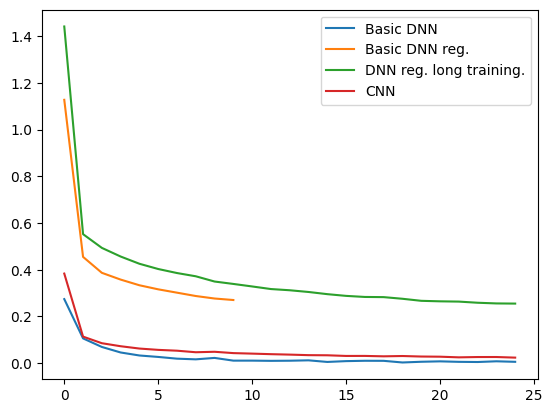

sparse_categorical_accuracy


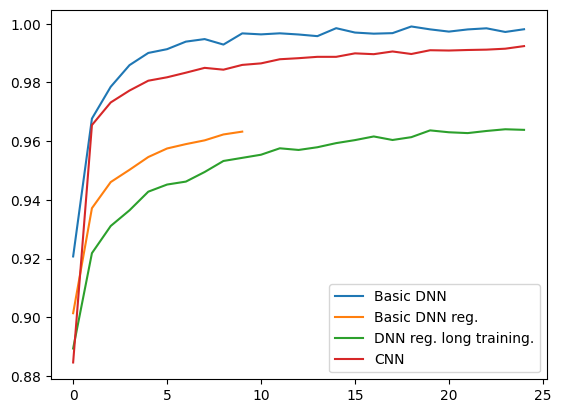

val_loss


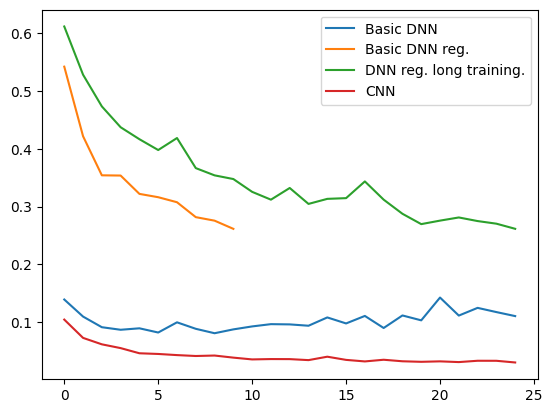

val_sparse_categorical_accuracy


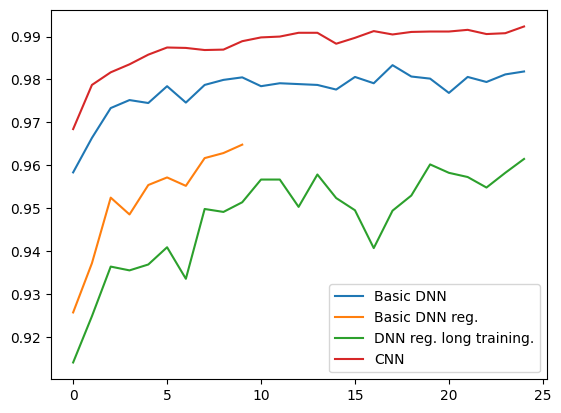

In [32]:
for i in hist_elements:
    print(i)
    for j in history:
        plt.plot(range(len(j[1].history[i])), j[1].history[i], label=j[0])
        plt.legend()
    plt.show()